In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CommViolPredUnnormalizedData.txt')
df.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [4]:
df = df.replace('?', np.nan)

In [5]:
age_groups = ['12t21', '12t29', '16t24', '65up']

for group in age_groups:
    df['ageCnt' + group] = (df['population'] * df['agePct' + group]).astype(int)
    
df[['population'] + ['agePct' + group for group in age_groups] + ['ageCnt' + group for group in age_groups]].head()

,population,agePct12t21,agePct12t29,agePct16t24,agePct65up,ageCnt12t21,ageCnt12t29,ageCnt16t24,ageCnt65up
0,11980,12.47,21.44,10.93,11.33,149390,256851,130941,135733
1,23123,11.01,21.30,10.48,17.18,254584,492519,242329,397253
2,29344,11.36,25.88,11.01,10.28,333347,759422,323077,301656
3,16656,12.55,25.20,12.19,17.57,209032,419731,203036,292645
4,11245,24.46,40.53,28.69,12.65,275052,455759,322619,142249


In [6]:
group_state_df = df.groupby('state')
group_state_df.sum()[['ageCnt' + group for group in age_groups]]

,ageCnt12t21,ageCnt12t29,ageCnt16t24,ageCnt65up
state,,,,
AK,3971927,8302160,3835631,1059150
AL,26531311,48598259,25509908,20155405
AR,12457357,23201471,11819576,10139231
AZ,37010700,74073284,36542705,24874683
CA,313751289,655608220,320917351,205368238
CO,26880244,54754699,26904829,18303615
CT,33001089,68383070,33322119,32500776
DC,8217425,18103827,9522261,6997557
DE,528838,951577,576638,252814


In [7]:
df.describe()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,ageCnt12t21,ageCnt12t29,ageCnt16t24,ageCnt65up
count,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2.215000e+03,2.215000e+03,2.215000e+03
mean,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,...,27.419955,2783.835034,3.041124,0.980163,7.764786,5.859296,7.602877e+05,1.526908e+06,7.639458e+05,5.859072e+05
std,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,...,109.822600,2828.993341,4.912917,2.877128,58.166468,9.156829,2.792631e+06,5.872683e+06,2.860104e+06,2.256703e+06
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,...,0.900000,10.000000,0.000000,0.000000,0.000000,0.000000,6.308400e+04,1.151000e+05,5.824800e+04,2.369900e+04
25%,3.000000,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,...,7.300000,1181.900000,0.360000,0.000000,0.000000,0.000000,2.022965e+05,3.772230e+05,1.801620e+05,1.637320e+05
50%,5.000000,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,...,13.700000,2027.300000,1.220000,0.000000,1.000000,2.170000,3.209700e+05,6.166910e+05,3.016520e+05,2.608680e+05
75%,8.000000,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,...,26.100000,3321.700000,3.365000,0.000000,3.000000,8.365000,6.170790e+05,1.225713e+06,6.083580e+05,4.835810e+05
max,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,...,3569.800000,44229.900000,54.330000,48.440000,1946.000000,91.090000,9.563268e+07,2.010776e+08,9.585236e+07,8.508819e+07


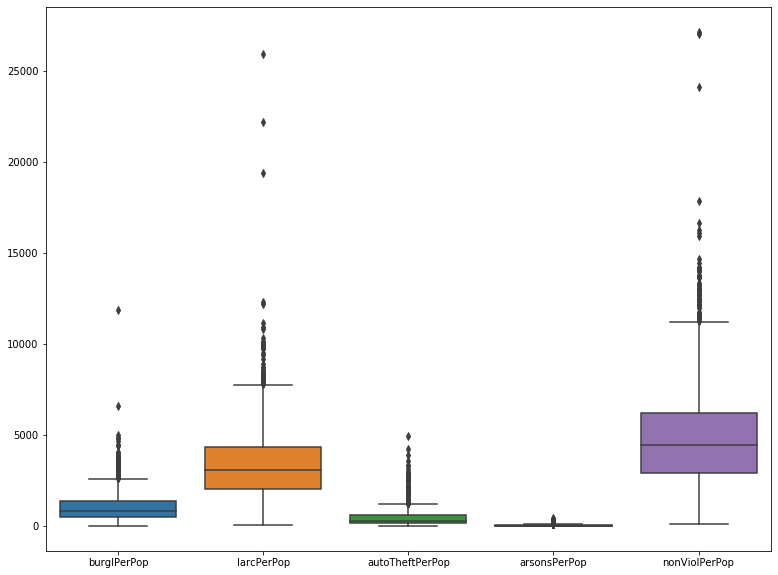

In [8]:
crime_df = df[['burglPerPop','larcPerPop','autoTheftPerPop','arsonsPerPop','nonViolPerPop']]

f, ax = plt.subplots(figsize=(13, 10))
sns.boxplot(data=crime_df)
plt.show()

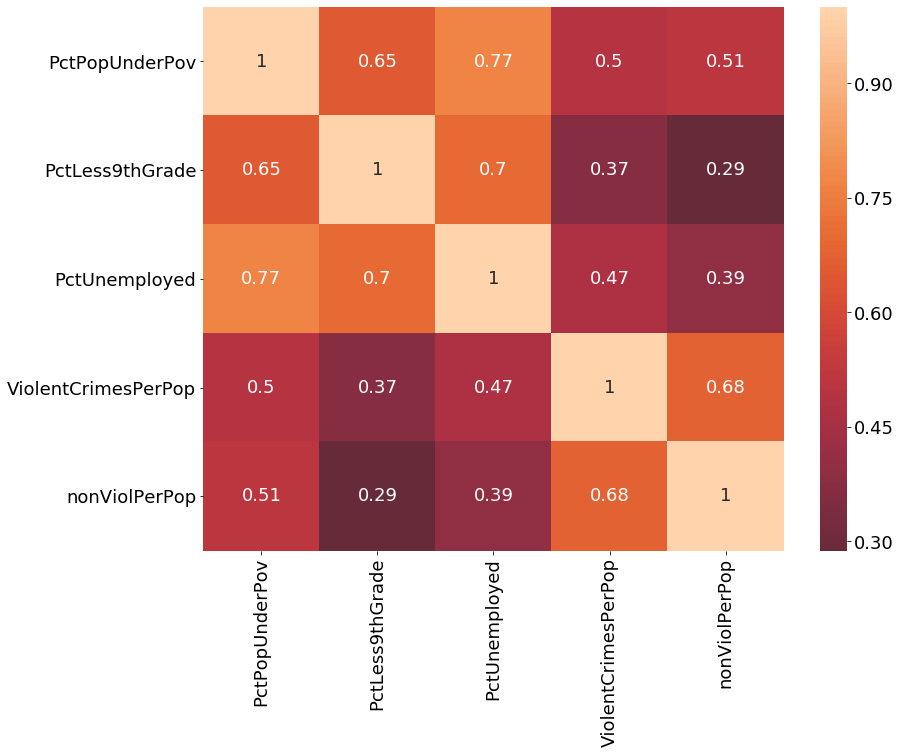

In [12]:
feature_columns = ['PctPopUnderPov', 'PctLess9thGrade', 'PctUnemployed', 'ViolentCrimesPerPop', 'nonViolPerPop']
filtered_df = df[feature_columns]

f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(filtered_df.dropna().astype(float).corr(), center=0, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()